In [160]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [161]:
# read the excel file
furniture = pd.read_excel("/content/Sample - Superstore.xls",parse_dates = ['Order Date'])
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [162]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [163]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [164]:
# Sort the Order Date 
furniture = furniture.sort_values('Order Date')

#print the sorted values
print(furniture.head(1))

#check any missing values
furniture.isnull().sum()

     Order Date   Sales
7980 2014-01-03  16.448


Order Date    0
Sales         0
dtype: int64

In [165]:
# grouping sales according to Order Date
furniture.groupby('Order Date')['Sales'].sum().reset_index()

# min and max values of Order Date
print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [166]:
#set 'Order Date' as index
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [167]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

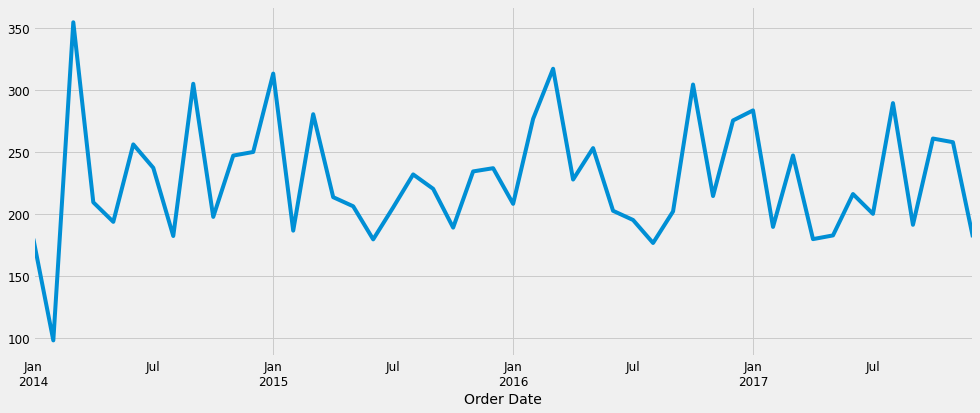

In [168]:
y.plot(figsize = (15, 6))
plt.show()

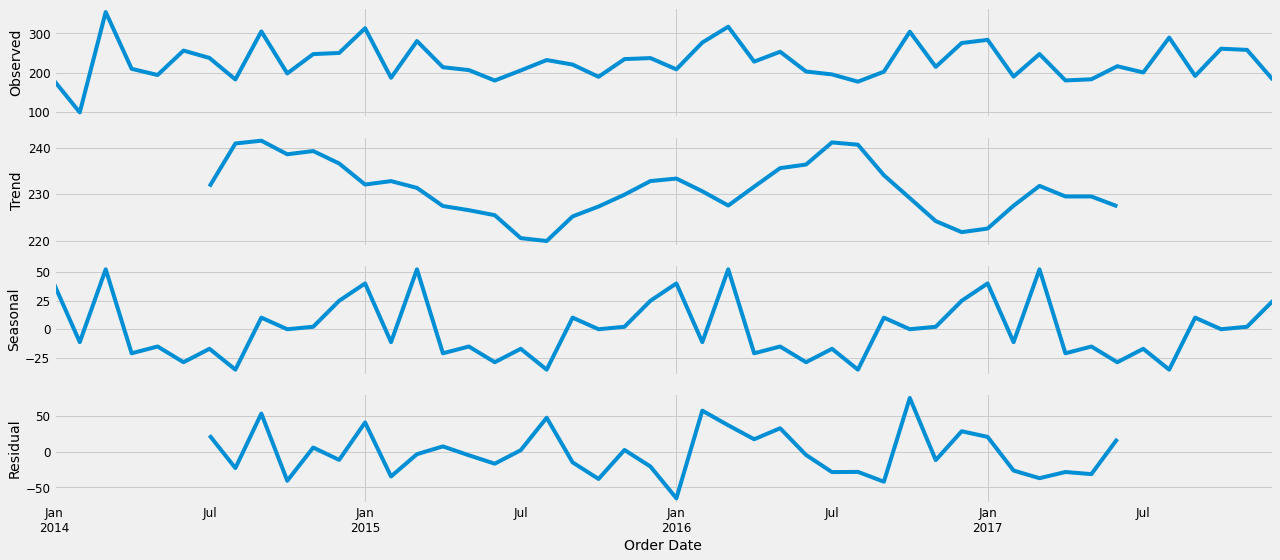

In [169]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [170]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [171]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2139.7564409844517
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.07466784791643
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131281718
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:563.3702892487465
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.738701365272
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.7073376670601


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2186.5545750862047
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.05723836320846
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511871065423
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:563.4641114113317
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.26524843858033
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537222


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1203.2592008814388
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987150406
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055305
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.1502241602361
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.24941907182017


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:902.9472443015476
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.56646108396745
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.00994558512895
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.09332875534443
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.9945048920486


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2439.429727093919
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.06203007562084
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.9272857949784
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5803860727382
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.2757103427854


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9337348994094
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2174.843448024131
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.5034128342466


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.734908939047
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.6486994364109
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.0818242406222
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.8818905467256


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1350.096152498638
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.0593708055824
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414870039


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1526.6677617539847
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.8530806572995
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.5628866933261


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1663.1952850549076
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.5619008071488
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.52247737024254


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1746.9953227850551
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.8481987643662


In [172]:


#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1392   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04


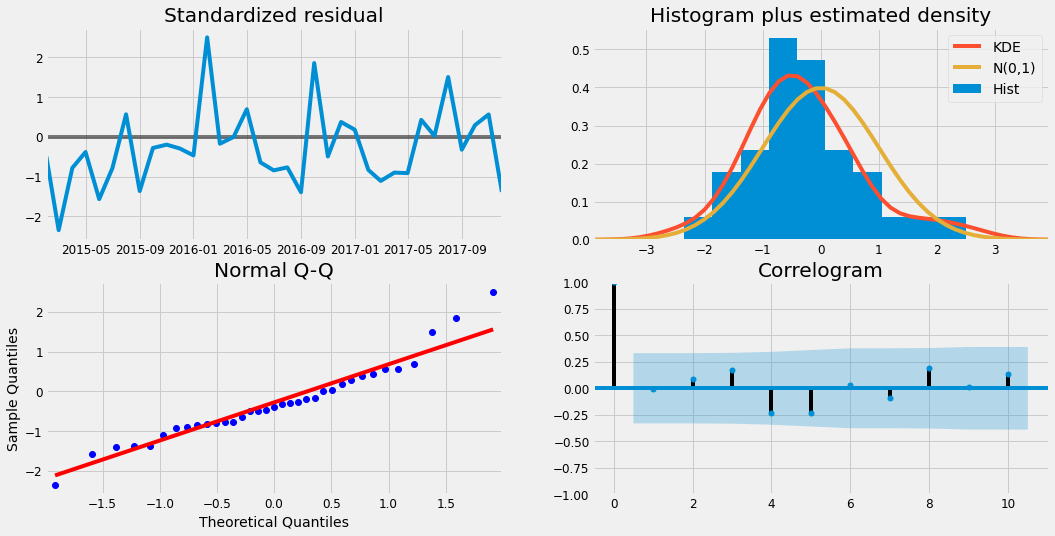

In [173]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()



It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.
Validating Forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.


In [174]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,166.949832,380.855434
2017-02-01,128.374778,341.873712
2017-03-01,201.126556,414.265413
2017-04-01,122.357193,335.174992
2017-05-01,126.153432,338.683177
2017-06-01,87.013284,299.283137
2017-07-01,92.953018,304.987209
2017-08-01,102.323362,314.142880
2017-09-01,103.098062,314.721215


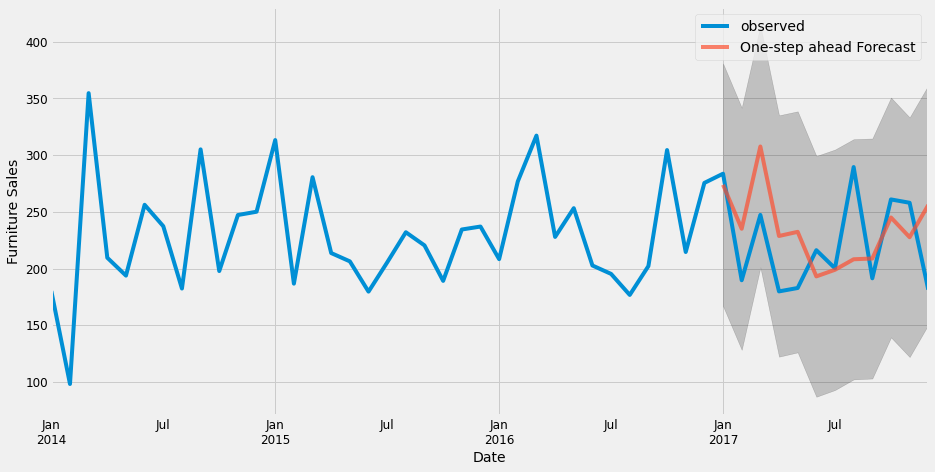

In [175]:


#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()



The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the yea

In [176]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 2069.58
The Root Mean Squared Error of our forecasts is 45.49


In [177]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def WMAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.sum((np.abs((y_true - y_pred)) / (y_true)) * 100*y_true)/np.sum(y_true)

In [178]:
mean_absolute_percentage_error(y_truth,y_hat)

17.79598486392041

In [179]:
WMAPE(y_truth,y_hat)

17.080207068874483

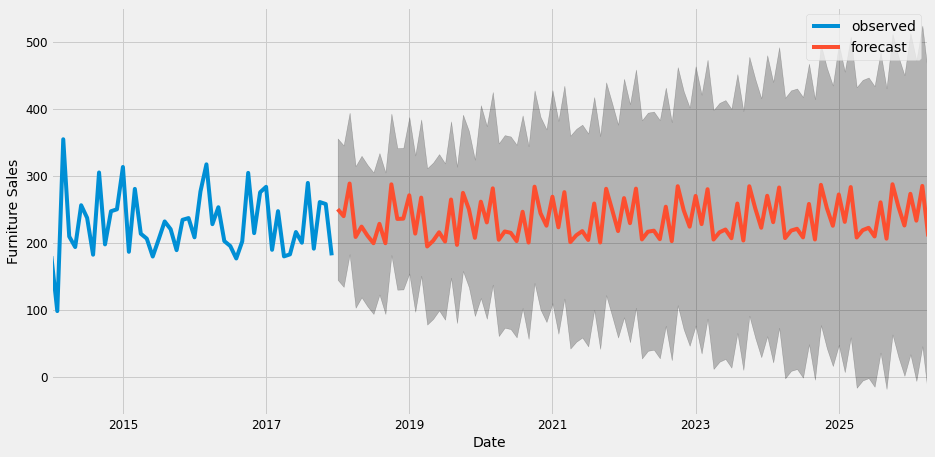

In [180]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()


Summary

  Our model clearly captured furniture sales seasonality.
  As we forecast further out into the future, it is natural for us to become less confident in our values.
  This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.



In [181]:
from statsmodels.tsa.holtwinters import Holt

In [182]:
train_df = furniture[:][:'2017-01-01']

In [183]:
es_model = Holt(train_df)
es_result = es_model.fit()
es_forecast = es_result.forecast(steps = 12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [184]:
y_test = y_truth

In [185]:
y_test

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

In [186]:
es_forecast.index = pd.to_datetime(y_test.index)
#es_forecast.index = es_forecast.index.date

In [187]:
es_forecast

Order Date
2017-01-01    263.264641
2017-02-01    263.286033
2017-03-01    263.307425
2017-04-01    263.328817
2017-05-01    263.350209
2017-06-01    263.371601
2017-07-01    263.392993
2017-08-01    263.414385
2017-09-01    263.435777
2017-10-01    263.457169
2017-11-01    263.478561
2017-12-01    263.499953
Freq: MS, dtype: float64

In [188]:
mape = mean_absolute_percentage_error(y_test,es_forecast)
print('MAPE',mape)
wmape = WMAPE(y_test,es_forecast)
print('WMAPE',wmape)

MAPE 24.247542829709705
WMAPE 21.33401584041889


In [189]:
!pip install pystan
!pip install fbprophet

In [190]:
from fbprophet import Prophet

In [191]:
furniture = pd.read_excel("/content/Sample - Superstore.xls")

In [192]:
# Remove columns which are not required in predictions

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [193]:
#set 'Order Date' as index
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2016-06-12', '2015-10-11',
               '2015-10-11', '2014-06-09', '2014-06-09', '2014-06-09',
               '2014-06-09', '2014-06-09',
               ...
               '2015-05-17', '2015-05-17', '2016-09-29', '2017-11-17',
               '2017-11-17', '2014-01-21', '2017-02-26', '2017-02-26',
               '2017-02-26', '2017-05-04'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [197]:
train_df.rename(columns = {'Order Date' : 'ds', 'Sales': 'y'}, inplace = True)
train_df['ds'] = train_df.index

In [198]:
train_df

,y,ds
Order Date,,
2014-01-03,16.448,2014-01-03
2014-01-04,11.784,2014-01-04
2014-01-04,272.736,2014-01-04
2014-01-04,3.540,2014-01-04
2014-01-05,19.536,2014-01-05
...,...,...
2017-01-01,141.420,2017-01-01
2017-01-01,15.224,2017-01-01
2017-01-01,13.748,2017-01-01


In [199]:
m = Prophet(interval_width=0.95, weekly_seasonality= True, yearly_seasonality= True)
model = m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [200]:
future = m.make_future_dataframe(periods=15,freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-03,213.092753,-1022.014460,1369.021441,213.092753,213.092753,-42.753626,-42.753626,-42.753626,2.887920,2.887920,2.887920,-45.641546,-45.641546,-45.641546,0.0,0.0,0.0,170.339128
1,2014-01-04,213.210054,-1173.638243,1469.480523,213.210054,213.210054,-68.016800,-68.016800,-68.016800,-13.724400,-13.724400,-13.724400,-54.292400,-54.292400,-54.292400,0.0,0.0,0.0,145.193254
2,2014-01-05,213.327355,-1140.168883,1368.167392,213.327355,213.327355,-67.232213,-67.232213,-67.232213,-5.363221,-5.363221,-5.363221,-61.868992,-61.868992,-61.868992,0.0,0.0,0.0,146.095141
3,2014-01-06,213.444655,-1069.976198,1371.120795,213.444655,213.444655,-59.826578,-59.826578,-59.826578,8.336754,8.336754,8.336754,-68.163332,-68.163332,-68.163332,0.0,0.0,0.0,153.618077
4,2014-01-07,213.561956,-1010.182118,1369.827919,213.561956,213.561956,-23.917030,-23.917030,-23.917030,49.076682,49.076682,49.076682,-72.993712,-72.993712,-72.993712,0.0,0.0,0.0,189.644926


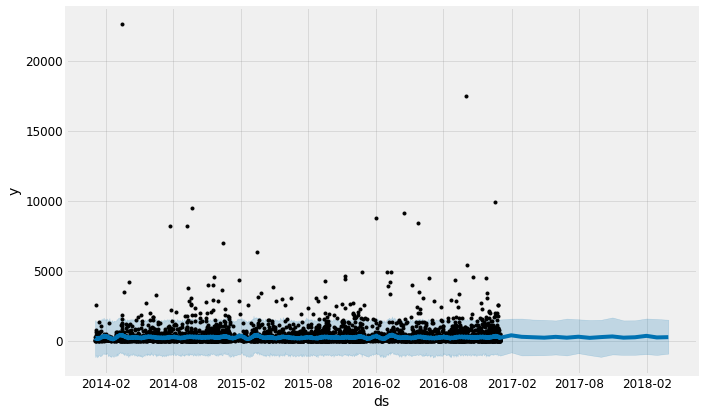

In [201]:
plot1 = m.plot(forecast)

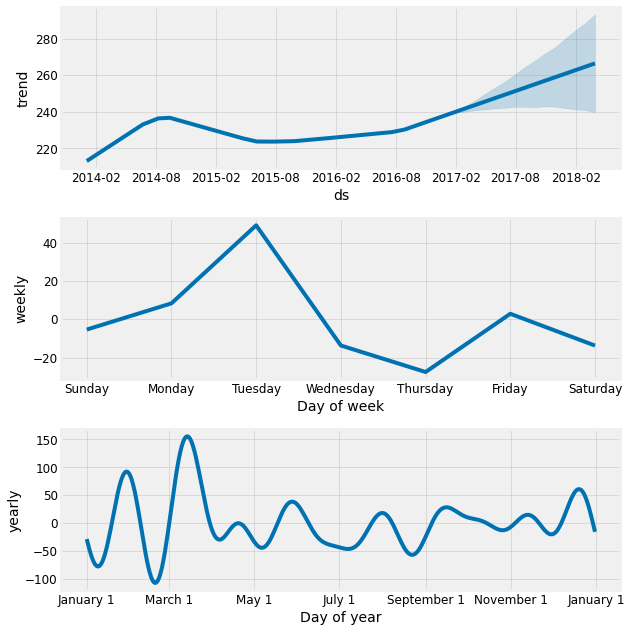

In [202]:
plot3 = m.plot_components(forecast)

In [203]:
prediction = forecast[['ds','yhat']][-15:-3]
prediction.set_index('ds')

,yhat
ds,
2017-01-31,379.288554
2017-02-28,271.960651
2017-03-31,239.771097
2017-04-30,210.354937
2017-05-31,269.081368
2017-06-30,209.404703
2017-07-31,277.684103
2017-08-31,197.480000
2017-09-30,252.351001


In [204]:
yhat = np.array(prediction['yhat'])

In [205]:
mean_absolute_percentage_error(y_truth,y_hat)

17.79598486392041